In [175]:
import numpy as np
import imageio as imageio
import matplotlib.pyplot as plt
%matplotlib inline

## Initialization

In [176]:
# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# convert locations to tuple format:
for i in locations.keys():
    locations[i] = (locations[i][0], locations[i][1])

start = locations['start']
movie = locations['movie']
snacks = locations['snacks']
food = locations['food']
store = locations['store']

## Task 1

In [177]:
def heuristic(current_node, goal_node):
    # Euclidean Distance:
    # return np.sqrt((current_node[0] - goal_node[0])**2 + (current_node[1] - goal_node[1])**2)

    # Manhattan Distance:
    return abs(current_node[0] - goal_node[0]) + abs(current_node[1] - goal_node[1])

    # Chebyshev Distance:
    # return max(abs(current_node[0] - goal_node[0]), abs(current_node[1] - goal_node[1]))

def get_neighbors(current_node, grid_map):
    neighbors = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            # skip the current cell
            if i == 0 and j == 0:
                continue
            neighbor_x = current_node[0] + i
            neighbor_y = current_node[1] + j
            # check if the neighbor is within the boundaries of the grid
            if neighbor_x >= 0 and neighbor_x < grid_map.shape[0] and neighbor_y >= 0 and neighbor_y < grid_map.shape[1]:
                # check if the neighbor is free
                if grid_map[neighbor_x, neighbor_y] == 255:
                    # compute the cost to reach the neighbor
                    if i == 0 or j == 0:
                        cost = 0.2
                    else:
                        cost = 0.282
                    neighbors.append(((neighbor_x, neighbor_y), cost))
    return neighbors

def Astar(grid_map, start, end):
    # initialize the open and closed sets
    open_set = {start: 0}
    closed_set = {}
    # initialize the came from and g score dictionaries
    came_from = {}
    g_score = {start: 0}
    
    # while the open set is not empty
    while open_set:
        # get the node with the lowest f score
        current_node = min(open_set, key=open_set.get)
        # if we reach the goal node, reconstruct the path and return it
        if current_node == end:
            path = [current_node]
            total_distance = 0
            while current_node in came_from:
                current_node, distance = came_from[current_node]
                path.append(current_node)
                total_distance += distance
            path.reverse()
            return path, total_distance, closed_set
        
        # move the current node from the open set to the closed set
        closed_set[current_node] = open_set.pop(current_node)
        # generate the list of valid neighbors
        neighbors = get_neighbors(current_node, grid_map)
        
        # loop over the neighbors
        for neighbor, cost in neighbors:
            # if the neighbor is already in the closed set, skip it
            if neighbor in closed_set:
                continue
            # compute the tentative g score for the neighbor
            tentative_g_score = g_score[current_node] + cost
            # if the neighbor is not in the open set, add it
            if neighbor not in open_set:
                open_set[neighbor] = tentative_g_score + heuristic(neighbor, end)
            # if the neighbor is already in the open set and the tentative g score is greater than or equal to the current g score, skip it
            elif tentative_g_score >= g_score[neighbor]:
                continue

            # update the came from dictionary and the g score dictionary with the new values
            came_from[neighbor] = (current_node, cost)
            g_score[neighbor] = tentative_g_score
            
    # if we reach this point, it means there is no path to the goal node
    return None, None, closed_set


In [178]:
start_node = movie 
end_node = food
path, distance, closed_set = Astar(grid_map, start_node, end_node)
print("Path: ", path)
print("Distance: ", distance)
print("Visited nodes: ", len(closed_set))

Path:  [(940, 545), (939, 546), (938, 547), (937, 548), (936, 549), (935, 550), (934, 551), (933, 552), (932, 553), (931, 554), (930, 555), (929, 556), (928, 557), (927, 558), (926, 559), (925, 560), (924, 561), (923, 562), (922, 563), (921, 564), (920, 565), (919, 566), (918, 567), (917, 568), (916, 569), (915, 570), (914, 571), (913, 572), (912, 573), (911, 574), (910, 575), (909, 576), (908, 577), (907, 578), (906, 579), (905, 580), (904, 581), (904, 582), (905, 583), (906, 584), (907, 585), (908, 585), (909, 586), (910, 587), (911, 588), (912, 589), (912, 590), (913, 591), (914, 592), (914, 593), (915, 594), (916, 595), (917, 596), (917, 597), (918, 598), (918, 599), (918, 600), (918, 601), (918, 602), (918, 603), (918, 604), (918, 605), (918, 606), (918, 607), (917, 608), (916, 609), (916, 610), (915, 611), (914, 612), (913, 613), (912, 614), (911, 615), (910, 616), (909, 617), (908, 618), (907, 619), (906, 620), (905, 621), (904, 622), (903, 623), (902, 624), (901, 625), (900, 62

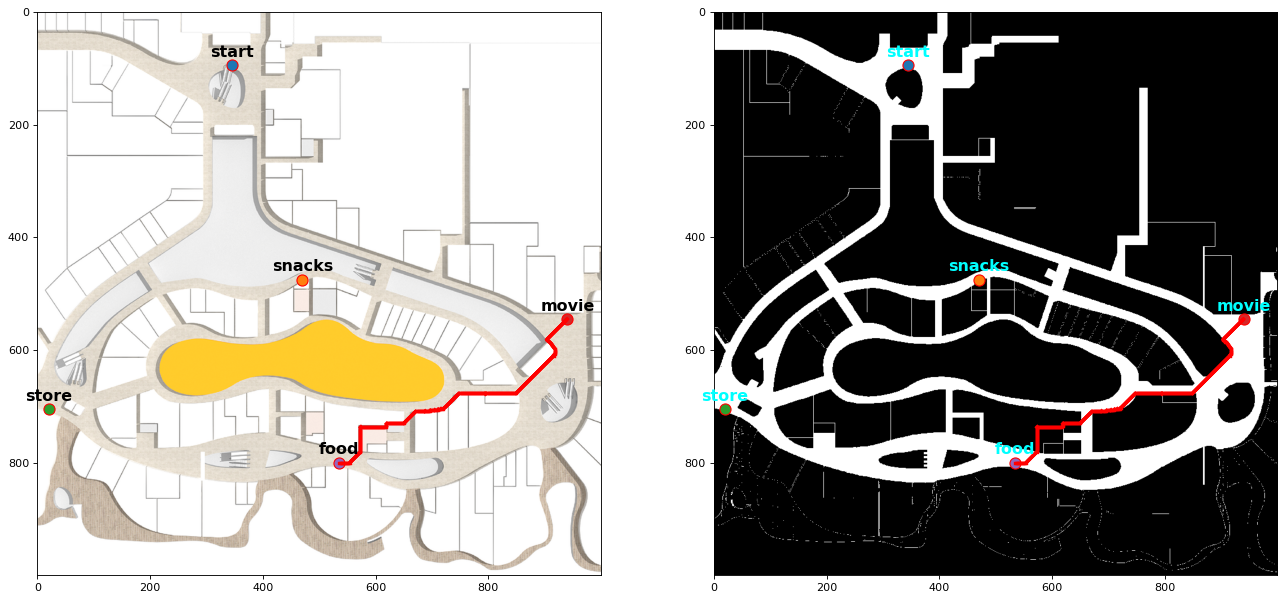

In [179]:
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
# plot the path
for i in range(len(path)-1):
    x = [path[i][0], path[i+1][0]]
    y = [path[i][1], path[i+1][1]]
    plt.plot(x, y, 'r', linewidth=3)
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
# plot the path
for i in range(len(path)-1):
    x = [path[i][0], path[i+1][0]]
    y = [path[i][1], path[i+1][1]]
    plt.plot(x, y, 'r', linewidth=3)
plt.show()

## Task 3 （Exhausted search）

Shortest distance: 651.38
Best path: start--->snacks--->movie--->food--->store--->startSize of the map: (1000, 1000)
Occupied Cells: 823039
Free Cells: 176961
Cell start is free: True
Cell snacks is free: True
Cell store is free: True
Cell movie is free: True
Cell food is free: True


<ipython-input-1-8d3750f8e76a>:325: RuntimeWarning: overflow encountered in ubyte_scalars
  if (grid_map[i - 1, j] + grid_map[i + 1, j] == 0 or grid_map[i, j - 1] + grid_map[i, j + 1] == 0 or grid_map[i + 1, j + 1] + grid_map[i - 1, j - 1] == 0 or grid_map[i + 1, j - 1] + grid_map[


Proceed time:75.20742058753967


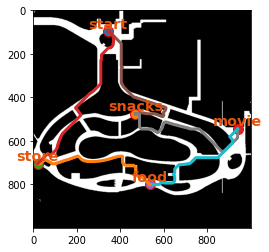

In [1]:
# -*- coding:utf-8 -*-
# @Time : 2023/3/23 18:37
# @Author: Gaven
# @File : hw3-task3.py
import numpy as np
import imageio
import matplotlib.pyplot as plt
import time


class Node_Elem:
    """
    开放列表和关闭列表的元素类型，parent用来在成功的时候回溯路径(即父节点位置)
    """

    def __init__(self, parent, x, y, dist):
        self.parent = parent
        self.x = x
        self.y = y
        self.dist = dist


class A_Star:
    """
    A星算法实现类
    """

    # w,h两个参数表示整个环境的长和宽
    def __init__(self, s_x, s_y, e_x, e_y, test_map, w=1000, h=1000):
        self.s_x = s_x
        self.s_y = s_y
        self.e_x = e_x
        self.e_y = e_y

        self.width = w
        self.height = h
        self.test_map = test_map

        self.open = []
        self.close = []
        self.path = []

    # 查找路径的入口函数
    def find_path(self):
        # 构建开始节点
        p = Node_Elem(None, self.s_x, self.s_y, dist=0.0)
        while True:
            # 扩展F值最小的节点
            self.extend_round(p)
            # 如果开放列表为空，则不存在路径，返回
            if not self.open:
                return
            # 获取F值最小的节点
            idx, p = self.get_best()
            # 找到路径，生成路径，返回
            if self.is_target(p):
                self.make_path(p)
                path_lenth = p.dist
                return path_lenth
            # 把此节点压入关闭列表，并从开放列表里删除
            self.close.append(p)
            del self.open[idx]

    def make_path(self, p):
        # 从结束点回溯到开始点，开始点的parent == None
        while p:
            self.path.append((p.x, p.y))
            p = p.parent

    def is_target(self, i):
        return i.x == self.e_x and i.y == self.e_y

    def get_best(self):
        best = None
        bv = 10000  # 如果修改的地图很大，可能需要修改这个值
        bi = -1
        for idx, i in enumerate(self.open):
            value = self.get_dist(i)  # 获取F值
            if value < bv:  # 比以前的更好，即F值更小
                best = i
                bv = value
                bi = idx
        return bi, best

    def get_dist(self, i):
        # F = G + H
        # G 为已经走过的路径长度， H为估计还要走多远
        # A*算法的精华。
        # return i.dist + math.sqrt(
        #     (self.e_x - i.x) * (self.e_x - i.x)
        #     + (self.e_y - i.y) * (self.e_y - i.y)) * 1.2
        # print(i.dist)
        return i.dist + (abs(self.e_x-i.x) + abs(self.e_y-i.y))

    def extend_round(self, p):
        # 可以从8个方向走
        xs = (-1, 0, 1, -1, 1, -1, 0, 1)
        ys = (-1, -1, -1, 0, 0, 1, 1, 1)
        # 只能走上下左右四个方向
        #        xs = (0, -1, 1, 0)
        #        ys = (-1, 0, 0, 1)
        for x, y in zip(xs, ys):
            new_x, new_y = x + p.x, y + p.y
            # 无效或者不可行走区域，则勿略
            if self.is_valid_coord(new_x, new_y):
                continue
            # 构造新的节点
            node = Node_Elem(p, new_x, new_y, p.dist + self.get_cost(
                p.x, p.y, new_x, new_y))
            # 新节点在关闭列表，则忽略
            if self.node_in_close(node):
                continue
            i = self.node_in_open(node)
            if i != -1:
                # 新节点在开放列表
                if self.open[i].dist > node.dist:
                    # 现在的路径到比以前到这个节点的路径更好~
                    # 则使用现在的路径
                    self.open[i].parent = p
                    self.open[i].dist = node.dist
                continue
            self.open.append(node)

    def get_cost(self, x1, y1, x2, y2):
        """
        上下左右直走，代价为0.2，斜走，代价为0.2*mart(2)
        """
        if (x1 == x2 and y1 != y2) or (x1 != x2 and y1 == y2):
            return 0.2
        return 0.282

    def node_in_close(self, node):
        for i in self.close:
            if node.x == i.x and node.y == i.y:
                return True
        return False

    def node_in_open(self, node):
        for i, n in enumerate(self.open):
            if node.x == n.x and node.y == n.y:
                return i
        return -1

    def is_valid_coord(self, x, y):
        if x < 0 or x >= self.width or y < 0 or y >= self.height:
            return True
        return test_map[x][y] == 0

    def get_searched(self):
        l = []
        for i in self.open:
            l.append((i.x, i.y))
        for i in self.close:
            l.append((i.x, i.y))
        return l


def lenth(path):
    path_lenth = 0
    for index in range(len(path)):
        if index + 1 != len(path):
            if (abs(path[index + 1][0] - path[index][0]) == 1 and abs(path[index + 1][1] - path[index][1]) == 0) or (
                    abs(path[index + 1][0] - path[index][0]) == 0 and abs(path[index + 1][1] - path[index][1]) == 1):
                path_lenth += 0.2
            else:
                path_lenth += 0.282
    return path_lenth


def load_map():
    # %matplotlib inline
    floor_plan = imageio.imread('./map/vivocity.png')
    grid_map_img = imageio.imread('./map/vivocity_freespace.png')
    grid_map = grid_map_img.transpose()
    test_map = grid_map
    print("Size of the map:", grid_map.shape)
    print("Occupied Cells:", np.count_nonzero(grid_map == 0))
    print("Free Cells:", np.count_nonzero(grid_map == 255))

    # Map resolution (Constant)
    MAP_RES = 0.2  # each cell represents a 0.2m x 0.2m square in reality

    # Locations on the map
    locations = {'start': [345, 95],  # Start from the level 2 Escalator
                 'snacks': [470, 475],  # Garrett Popcorn
                 'store': [20, 705],  # DJI Store
                 'movie': [940, 545],  # Golden Village
                 'food': [535, 800],  # PUTIEN
                 }

    location = [x for x in locations]

    # A helper function to mark the locations on the map
    def plot_locations(locations: dict, color: 'str' = 'black'):
        for key, value in locations.items():
            plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
            plt.text(locations[key][0], locations[key][1] - 15, s=key, fontsize='x-large', fontweight='bold', c=color,
                     ha='center')
        return

    # Plot the locaitons on the map
    # plt.figure(figsize=(20, 10), dpi=80)
    # plt.subplot(1, 2, 1)
    # plt.imshow(floor_plan)
    # plot_locations(locations)
    #
    # plt.subplot(1, 2, 2)
    # plt.imshow(grid_map_img, cmap='gray')
    # plot_locations(locations, color='cyan')
    # plt.show()

    # Check if the designated locations are free
    for key, value in locations.items():
        print(f"Cell {key} is free: {grid_map[value[0], value[1]] == 255}")
    return test_map, locations, location


def permute(nums, start):
    res = []
    answer = []
    nums.remove(start)  # 先将起始元素从列表中移除
    backtrack(nums, res, answer)
    for i in range(len(res)):
        res[i].append(start)  # 将起始元素插入所有可能性的末尾
        res[i].insert(0, start)  # 将起始元素插入所有可能性的末尾
    return res


def backtrack(nums, res, answer):
    if not nums:
        res.append(answer[:])
    for i in range(len(nums)):
        answer.append(nums[i])
        _pop = nums.pop(i)
        backtrack(nums, res, answer)
        nums.insert(i, _pop)
        answer.pop()


def map(grid_map):
    for i in range(1000):
        for j in range(1000):
            if grid_map[i, j] == 0:
                continue
            else:
                # current node is white, 255
                if i == 999 or j == 999:
                    continue
                if (grid_map[i - 1, j] + grid_map[i + 1, j] == 0 or grid_map[i, j - 1] + grid_map[i, j + 1] == 0 or grid_map[i + 1, j + 1] + grid_map[i - 1, j - 1] == 0 or grid_map[i + 1, j - 1] + grid_map[
                    i - 1, j + 1] == 0):
                    # this road is only one pixel
                    grid_map[i, j] = 0
    return grid_map


def permute(nums, start):
    res = []
    answer = []
    nums.remove(start)  # 先将起始元素从列表中移除
    backtrack(nums, res, answer)
    for i in range(len(res)):
        res[i].append(start)  # 将起始元素插入所有可能性的末尾
        res[i].insert(0, start)  # 将起始元素插入所有可能性的末尾
    return res


def backtrack(nums, res, answer):
    if not nums:
        res.append(answer[:])
    for i in range(len(nums)):
        answer.append(nums[i])
        _pop = nums.pop(i)
        backtrack(nums, res, answer)
        nums.insert(i, _pop)
        answer.pop()


def tsp(distances, locations):
    location = [x for x in locations]
    res = permute(location, str('start'))
    n = len(distances)
    min_distance = float('inf')
    best_path = []
    paths = []
    for i in range(len(res)):
        path = []
        for j in range(len(res[i])):
            path.append(locations[str(res[i][j])])
        paths.append(path)
    for path in paths:
        distance = 0
        last = 0
        for i in path:
            distance += distances[last][i]
            last = i
        distance += distances[last][0]

        if distance < min_distance:
            min_distance = distance
            best_path = path
    print("Shortest distance:", min_distance)
    names = []
    for path in best_path:
        for key, value in locations.items():
            if value == path:
                names.append(key)
    print("Best path:", end=' ')
    for i in range(len(names)):
        if i != 0:
            print("--->{}".format(names[i]), end='')
        else:
            print("{}".format(names[i]), end='')
    return names


def map(grid_map):
    for i in range(1000):
        for j in range(1000):
            if grid_map[i, j] == 0:
                continue
            else:
                # current node is white, 255
                if i == 999 or j == 999:
                    continue
                if (grid_map[i - 1, j] + grid_map[i + 1, j] == 0 or grid_map[i, j - 1] + grid_map[i, j + 1] == 0 or grid_map[i + 1, j + 1] + grid_map[i - 1, j - 1] == 0 or grid_map[i + 1, j - 1] + grid_map[
                    i - 1, j + 1] == 0):
                    # this road is only one pixel
                    grid_map[i, j] = 0
    return grid_map


def find_path(test_map, locations, res):
    path_lenth, search_num = 0, 0
    all_path = []
    for index, path in enumerate(res):
        if index + 1 != len(res):
            start_x = locations[path][0]
            start_y = locations[path][1]
            end_x = locations[res[index + 1]][0]
            end_y = locations[res[index + 1]][1]
            a_star = A_Star(start_x, start_y, end_x, end_y, test_map)
            path_lenth += a_star.find_path()
            searched = a_star.get_searched()
            search_num += len(searched)
            path = a_star.path
            all_path.append(path)
    all_x, all_y = [], []
    for i in range(len(all_path)):
        x, y = [], []
        for j in range(len(all_path[i])):
            x.append((all_path[i][j][0]))
            y.append([all_path[i][j][1]])
        all_x.append(x)
        all_y.append(y)
    color = plt.cm.get_cmap('tab20c')
    color = color.colors
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1] - 15, s=key, fontsize='x-large', fontweight='bold', c=color[i],
                 ha='center')
    for num in range(len(all_x)):
        plt.plot(all_x[num], all_y[num], color[num], linewidth=3)
    plt.imshow(test_map.transpose(), cmap='gray')



if __name__ == "__main__":
    start_time = time.time()
    distances = [[0.0, 151.13, 163.28, 182.58, 232.15],
                 [142.85, 0.0, 118.06, 106.91, 133.13],
                 [161.60, 122.44, 0.0, 218.48, 131.06],
                 [207.44, 139.46, 248.82, 0.0, 117.34],
                 [230.97, 133.78, 114.40, 117.25, 0.0]
                 ]
    locations = {'start': 0,  # Start from the level 2 Escalator
                 'snacks': 1,  # Garrett Popcorn
                 'store': 2,  # DJI Store
                 'movie': 3,  # Golden Village
                 'food': 4,  # PUTIEN
                 }
    res = tsp(distances, locations)
    test_map, locations, location = load_map()
    test_map = map(test_map)
    find_path(test_map, locations, res)
    end_time = time.time()
    print("Proceed time:" + str(end_time - start_time))
    plt.show()

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


<ipython-input-5-f02bcd98eab2>:33: RuntimeWarning: divide by zero encountered in true_divide
  e_mat_init = 1.0 / (dis_mat + np.diag([10000] * cityNum))
<ipython-input-5-f02bcd98eab2>:86: RuntimeWarning: divide by zero encountered in double_scalars
  pheromone_change[path_mat[i, j]][path_mat[i, j + 1]] += Q / dis_mat[path_mat[i, j]][path_mat[i, j + 1]]


+-------------------+---------------------------------------------------------+
|     Parameter     | Result                                                  |
+-------------------+---------------------------------------------------------+
| Shortest distance | start --> snacks --> store --> movie --> food --> start |
|     Best path     | 651.38                                                  |
|      Run time     | 252.322ms                                               |
+-------------------+---------------------------------------------------------+


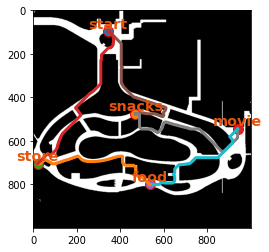

In [5]:
# -*- coding:utf-8 -*-
# @Time : 2023/3/24 15:44
# @Author: Gaven
# @File : hw3-task3-2.py
import numpy as np
import random
import time
import numpy as np
! pip install prettytable
from prettytable import PrettyTable


num_ant = 4
alpha = 2
beta = 1
info = 0.3
Q = 5


def cal_newpath(dis_mat, path_new, cityNum):
    dis_list = []
    for each in path_new:
        dis = 0
        for j in range(cityNum - 1):
            dis = dis_mat[each[j]][each[j + 1]] + dis
        dis = dis_mat[each[cityNum - 1]][each[0]] + dis  # 回家
        dis_list.append(dis)
    return dis_list


def getDisAndPath(point, cityNum, setting):
    dis_mat = np.array(point)
    e_mat_init = 1.0 / (dis_mat + np.diag([10000] * cityNum))
    diag = np.diag([1.0 / 10000] * cityNum)
    e_mat = e_mat_init - diag
    pheromone_mat = np.ones((cityNum, cityNum))
    path_mat = np.zeros((num_ant, cityNum)).astype(int)
    count_iter = 0
    counter = 0
    ifOptimanation = setting["ifOptimanation"]
    threshold = setting["threshold"]
    iter_max = setting["iter_max"]
    skipNum = setting["skipNum"]
    pre_min_path = 0
    while count_iter < iter_max:
        for ant in range(num_ant):
            visit = 0
            unvisit_list = list(range(1, cityNum))
            for j in range(1, cityNum):
                trans_list = []
                tran_sum = 0
                trans = 0
                for k in range(len(unvisit_list)):
                    trans += np.power(pheromone_mat[visit][unvisit_list[k]], alpha) * np.power(
                        e_mat[visit][unvisit_list[k]], beta)
                    trans_list.append(trans)
                    tran_sum = trans
                rand = random.uniform(0, tran_sum)
                for t in range(len(trans_list)):
                    if rand <= trans_list[t]:
                        visit_next = unvisit_list[t]
                        break
                    else:
                        continue
                path_mat[ant, j] = visit_next
                unvisit_list.remove(visit_next)
                visit = visit_next
        dis_allant_list = cal_newpath(dis_mat, path_mat, cityNum)
        if count_iter == 0:
            dis_new = min(dis_allant_list)
            path_new = path_mat[dis_allant_list.index(dis_new)].copy()
        else:
            if min(dis_allant_list) < dis_new:
                dis_new = min(dis_allant_list)
                path_new = path_mat[dis_allant_list.index(dis_new)].copy()
        if ifOptimanation == True:
            if round(pre_min_path, 2) == round(dis_new, 2):
                counter += 1
                if counter >= threshold:
                    iter_max -= skipNum
                    counter = 0
            pre_min_path = dis_new
        pheromone_change = np.zeros((cityNum, cityNum))
        for i in range(num_ant):
            for j in range(cityNum - 1):
                pheromone_change[path_mat[i, j]][path_mat[i, j + 1]] += Q / dis_mat[path_mat[i, j]][path_mat[i, j + 1]]
            pheromone_change[path_mat[i, cityNum - 1]][path_mat[i, 0]] += Q / dis_mat[path_mat[i, cityNum - 1]][
                path_mat[i, 0]]
        pheromone_mat = (1 - info) * pheromone_mat + pheromone_change
        count_iter += 1
    return dis_new, path_new.tolist(), iter_max


def timeFormat(number):
    if number < 10:
        return "0" + str(number)
    else:
        return str(number)


def calcTime(time):
    count = 0
    while time < 1:
        if count == 3:
            break
        else:
            count += 1
        time *= 1000
    if count == 0:
        hour = int(time // 3600)
        minute = int(time % 3600 // 60)
        second = time % 60
        if hour > 0: return timeFormat(hour) + "h" + timeFormat(minute) + "m" + timeFormat(int(second)) + "s"
        if minute > 0: return timeFormat(minute) + "m" + timeFormat(int(second)) + "s"
        if second > 0: return str(round(time, 3)) + "s"
    elif count == 1:
        return str(round(time, 3)) + "ms"
    elif count == 2:
        return str(round(time, 3)) + "us"
    elif count == 3:
        return str(round(time, 3)) + "ns"


def pathToString(path, everyRowNum):
    locations = {'start': 0,  # Start from the level 2 Escalator
                 'snacks': 1,  # Garrett Popcorn
                 'store': 2,  # DJI Store
                 'movie': 3,  # Golden Village
                 'food': 4,  # PUTIEN
                 }
    min_path_str = ""
    for i in range(len(path)):
        for key, value in locations.items():
            if value == i:
                min_path_str += str(key) + ("\n--> " if i != 0 and i % everyRowNum == 0 else " --> ")
    min_path_str += "start"
    return min_path_str


def printTable(path, everyRowNum, runTime, distance):
    path_str = pathToString(path, everyRowNum)
    time_str = calcTime(runTime)
    result_obj = {
        "header": ["Parameter ", "Result"],
        "body": [
            ["Shortest distance", path_str],
            ["Best path", distance],
            ["Run time", time_str],
        ],
        "align": [
            {"name": "Parameter", "method": "l"},
            {"name": "Result", "method": "l"}
        ],
    }
    createTable(result_obj)


def createTable(table_obj):
    pt = PrettyTable()
    for key in table_obj:
        if key == "header":
            pt.field_names = table_obj[key]
        elif key == "body":
            for i in range(len(table_obj[key])):
                pt.add_row(table_obj[key][i])
        elif key == "align":
            for i in range(len(table_obj[key])): pt.align[table_obj[key][i]["name"]] = table_obj[key][i]["method"]
        elif key == "setting":
            for key1 in table_obj[key]:
                if key1 == "border":
                    pt.border = table_obj[key][key1]
                elif key1 == "hearder":
                    pt.header = table_obj[key][key1]
                elif key1 == "padding_width":
                    pt.padding_width = table_obj[key][key1]
    print(pt)


def antColonyOptimization(cityNum, coordinate, point, setting):
    start = time.time()
    dis, path, iterNum = getDisAndPath(point, cityNum, setting)
    end = time.time()
    printTable(path, 7, end - start, round(dis, 2))
    return round(dis, 2), end - start, iterNum


def InitD():
    cityNum = 6
    coordinate = [(345, 95), (470, 475), (940, 545), (535, 800), (20, 705), (345, 95)]
    locations = np.array([[0.0, 151.13, 163.28, 182.58, 232.15, 0],
                 [142.85, 0.0, 118.06, 106.91, 133.13, 142.85],
                 [161.60, 122.44, 0.0, 218.48, 131.06, 161.60],
                 [207.44, 139.46, 248.82, 0.0, 117.34, 207.44],
                 [230.97, 133.78, 114.40, 117.25, 0.0, 230.97],
                      [0.0, 151.13, 163.28, 182.58, 232.15, 0],
                 ])

    return cityNum, coordinate, locations


def ACO():
    cityNum, coordinate, point = InitD()
    antColonyOptimization(cityNum, coordinate, point, setting={
        "iter_max": 300,
        "ifOptimanation": False,
        "threshold": 6,
        "skipNum": 20
    })


if __name__ == '__main__':
    ACO()
    find_path(test_map, locations, res)
    plt.show()
